In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [46]:
df = pd.read_csv('data/processed_data.csv', index_col=0, parse_dates=True)

In [47]:
df.head(5)

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date               datetime64[ns]
TotalBikesCount           float64
Mon                         int64
Tue                         int64
Wed                         int64
Thu                         int64
Fri                         int64
Sat                         int64
Sun                         int64
holiday                     int64
DayLightHrs               float64
AvgTempInC                float64
PRCP_IN                   float64
DryDay                      int64
YearsCount                float64
dtype: object

In [49]:
df = df.set_index('Date')
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [50]:
df.shape

(2097, 14)

In [51]:
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay',
       'YearsCount'],
      dtype='object')

In [52]:
# fit_intercept : whether to calculate the intercept for this model. 
# If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
# In this use case, we'll set fit_intercept = False, 
# because the daily flags essentially operate as their own day-specific intercepts
indep_cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay','YearsCount']
x = df[indep_cols]
y = df['TotalBikesCount']

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [63]:
predictions = model.predict(x)
predictions

array([3509.10208841, 3375.37680672, 3171.1559462 , ..., 4294.78165878,
       4075.72089562, 2626.74466652])

In [64]:
df1= df[['TotalBikesCount']].copy()
df1['Predictions'] = predictions
df1.head(5)

,TotalBikesCount,Predictions
Date,,
2012-10-03,3521.0,3509.102088
2012-10-04,3475.0,3375.376807
2012-10-05,3148.0,3171.155946
2012-10-06,2006.0,1859.059961
2012-10-07,2142.0,1776.258124


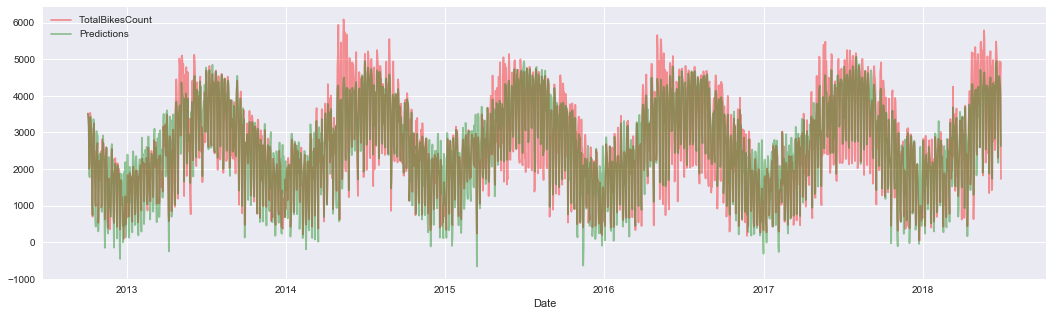

In [65]:
import datetime as dt
df1.plot(alpha=0.4, figsize=(18,5), color=['r','g'])
plt.legend(loc='upper left')
plt.show()
# If x-axis doesn't show years, make sure the 'Date' column was converted to datetime from String, before it was set as index

It is evident that we have missed some key features, especially during the summer time. Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).

Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [66]:
model.coef_

array([-6.54065823e+02, -5.26114967e+02, -5.40396337e+02, -6.88055804e+02,
       -1.00778818e+03, -2.35415766e+03, -2.43062192e+03, -1.20007497e+03,
        1.11462695e+02,  4.06258710e+02, -1.75737653e+05,  5.17444792e+02,
        4.02758119e+01])

In [75]:
coeffs = pd.Series(model.coef_, index=x.columns)
coeffs

Mon              -629.666069
Tue              -600.053469
Wed              -554.505713
Thu              -707.803863
Fri              -955.573521
Sat             -2350.491468
Sun             -2462.549407
holiday         -1188.521513
DayLightHrs       121.142992
AvgTempInC        389.793336
PRCP_IN       -180406.067428
DryDay            513.302608
YearsCount         30.027097
dtype: float64

These numbers are difficult to interpret without some measure of their uncertainty. 

We can compute these uncertainties quickly using bootstrap resamplings of the data:

In [70]:
# Karthik's Playground
# The bootstrap/resapling is mainly used for test statistics rather than regression coefficients.
from sklearn.utils import resample
model.fit(x, y)
print('model.coef_',model.coef_)
model.fit(*resample(x, y))
print('model.coef_',model.coef_)
model.fit(*resample(x, y))
print('model.coef_',model.coef_)
print('Why are the  coefficients different with data resampling/shuffling? Only the order of the data is changed and not the data itself, right?')


temp = np.asarray([
                [1,1,2,3,4], # 1st row
                [2,6,7,8,9], # 2nd row
                [3,6,7,8,9], # 3rd row
                [4,6,7,8,9], # 4th row
                [5,6,7,8,9]  # 5th row
              ])
print('temp :',temp)
print('temp resampled :',resample(temp))
print('Resampled data is different and seems close to the original one. And now you know why the coefficients are different.')

model.coef_ [-6.54065823e+02 -5.26114967e+02 -5.40396337e+02 -6.88055804e+02
 -1.00778818e+03 -2.35415766e+03 -2.43062192e+03 -1.20007497e+03
  1.11462695e+02  4.06258710e+02 -1.75737653e+05  5.17444792e+02
  4.02758119e+01]
model.coef_ [-5.53990013e+02 -4.51821627e+02 -4.61830486e+02 -5.81241105e+02
 -9.23014265e+02 -2.29516950e+03 -2.36339164e+03 -1.28280976e+03
  1.13751028e+02  3.87193039e+02 -1.82879497e+05  5.01889244e+02
  3.93835470e+01]
model.coef_ [-6.46986656e+02 -4.68069839e+02 -5.38272135e+02 -6.79250491e+02
 -9.84500209e+02 -2.33731013e+03 -2.40970355e+03 -1.14107449e+03
  1.07640402e+02  4.17867598e+02 -1.81689829e+05  4.85303336e+02
  3.42770324e+01]
Why are the  coefficients different with data resampling/shuffling? Only the order of the data is changed and not the data itself, right?
temp : [[1 1 2 3 4]
 [2 6 7 8 9]
 [3 6 7 8 9]
 [4 6 7 8 9]
 [5 6 7 8 9]]
temp resampled : [[3 6 7 8 9]
 [2 6 7 8 9]
 [2 6 7 8 9]
 [4 6 7 8 9]
 [2 6 7 8 9]]
Resampled data is different and

In [74]:
from sklearn.utils import resample
np.random.seed(1)
coeffs_tmp = [model.fit(*resample(x, y)).coef_ for i in range(1000)]
err = np.std(coeffs_tmp,0) #Columnar STD

In [76]:
# With these errors estimated, let's again look at the results:
print(pd.DataFrame({'effect': coeffs.round(0),
                    'error': err.round(0)}))

               effect    error
Mon            -630.0     66.0
Tue            -600.0     69.0
Wed            -555.0     67.0
Thu            -708.0     67.0
Fri            -956.0     66.0
Sat           -2350.0     64.0
Sun           -2463.0     64.0
holiday       -1189.0    114.0
DayLightHrs     121.0      7.0
AvgTempInC      390.0     16.0
PRCP_IN     -180406.0  11018.0
DryDay          513.0     25.0
YearsCount       30.0      6.0


#### Observations
* We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
* We see that for each additional hour of daylight, 121 ± 7 more people choose to ride; 
* A temperature increase of one degree Celsius encourages 390 ± 16 people to grab their bicycle; 
* A dry day means an average of 513 ± 25 more riders, and 
* Each inch of precipitation means 180406 ± 11018 more people leave their bike at home. 
* Once all these effects are accounted for, we see a modest increase of 30 ± 6 new daily riders each year.